# Timeseries module - demo

`pynsitu.tseries` implements methods useful to the time series analysis

Assumptions about the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pynsitu as pin

---

## generate synthetic time series


In [2]:
tdefault = dict(start="2018-01-01", end="2018-01-30", freq="1H")


def generate_time_series(label="time", uniform=True):
    """Create a time series: periodical signal with noise"""
    time = pd.date_range(**tdefault)
    if not uniform:
        nt = time.size
        import random

        random.seed(0)
        time = time[random.sample(range(nt), 2 * nt // 3)].sort_values()
    time_scale = pd.Timedelta("1D")
    v = (
        np.cos(2 * np.pi * ((time - time[0]) / time_scale))
        + np.random.randn(time.size) / 2
    )
    df = pd.DataFrame({"v": v, label: time})
    df = df.set_index(label)
    return df

In [3]:
# actually generate one time series
df = generate_time_series(uniform=False)
df.head()

,v
time,
2018-01-01 00:00:00,1.189463
2018-01-01 01:00:00,1.148150
2018-01-01 04:00:00,-0.202784
2018-01-01 06:00:00,0.181797
2018-01-01 07:00:00,0.255133


<Axes: xlabel='time'>

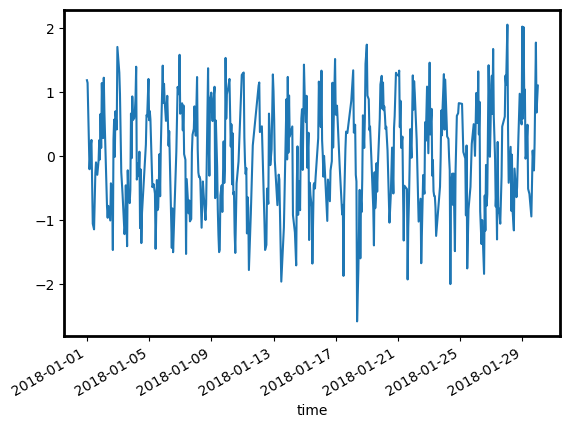

In [4]:
df.v.plot()

---

## basic editing

### triming based on deployment information

<Axes: xlabel='time'>

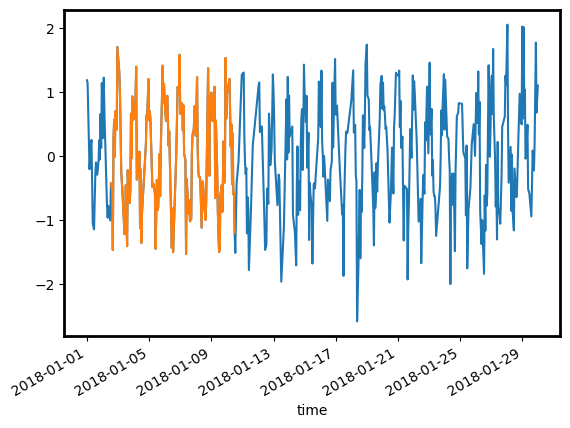

In [5]:
d = pin.events.Deployment(
    "some_event",
    start="2018/01/02 12:12:00",
    end="2018/01/10 12:12:00",
)

df_trimmed = df.ts.trim(d)

df.v.plot()
df_trimmed.v.plot()

### resampling on a regular timeline

In [6]:
df_resampled = df.ts.resample_uniform("1H")

(17532.75, 17533.791666666668)

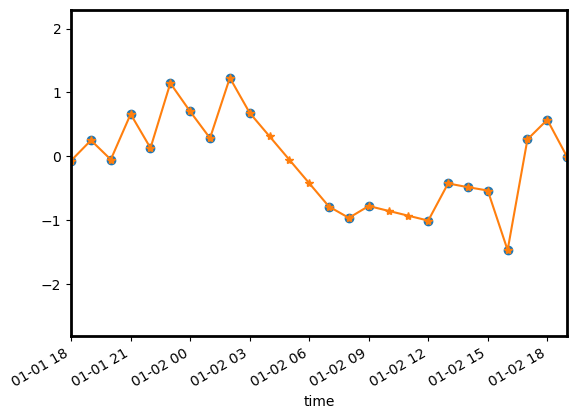

In [9]:
fig, ax = plt.subplots(1, 1)
df.v.plot(marker="o", ls="None")
df_resampled.v.plot(marker="*")
ax.set_xlim(df.index[10], df.index[30])

---
## spectral analysis

In [18]:
E = df_resampled.ts.spectrum(nperseg=24 * 5)
E.head()

,v
frequency,
-12.0,0.003961
-11.8,0.003095
-11.6,0.003577
-11.4,0.003211
-11.2,0.005026


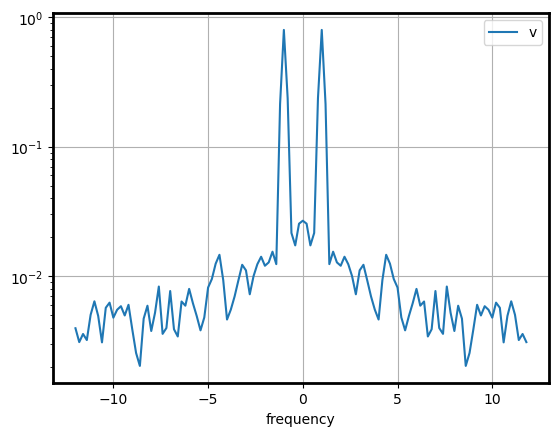

In [19]:
E.plot()
plt.yscale("log")
plt.grid()

---
## filtering

---
## tidal analysis